In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /Users/tajudeenadeyemi/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
data = df.drop("koi_disposition", axis=1)

In [6]:
target = df["koi_disposition"]

In [7]:
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42) 

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8998855835240275

In [11]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.10941008456620324, 'koi_fpflag_co'),
 (0.09467659135199327, 'koi_fpflag_nt'),
 (0.07025548279640699, 'koi_fpflag_ss'),
 (0.057305210516350194, 'koi_model_snr'),
 (0.04653074702313214, 'koi_prad'),
 (0.03432687977058755, 'koi_duration_err1'),
 (0.03412466791177771, 'koi_steff_err2'),
 (0.03408947945880645, 'koi_fpflag_ec'),
 (0.033903950771969164, 'koi_duration_err2'),
 (0.03327173707428629, 'koi_prad_err2'),
 (0.031179133420670233, 'koi_prad_err1'),
 (0.029897842702244656, 'koi_steff_err1'),
 (0.02254879636912374, 'koi_time0bk_err2'),
 (0.022269950878015487, 'koi_time0bk_err1'),
 (0.022211244475625846, 'koi_period'),
 (0.021765021299921892, 'koi_duration'),
 (0.019425940431800837, 'koi_depth'),
 (0.018655645548862895, 'koi_impact'),
 (0.018491178359599424, 'koi_insol_err1'),
 (0.01843402555311098, 'koi_period_err1'),
 (0.01801475878765499, 'koi_period_err2'),
 (0.01649547966608912, 'koi_insol'),
 (0.015560045598036566, 'koi_teq'),
 (0.014239589791534602, 'koi_depth_err1'),
 (0.0130

# Select your features (columns)

In [12]:
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad', 'koi_depth', 'koi_duration', 'koi_impact'
       ,'koi_teq','koi_insol', 'koi_time0bk','koi_period']]
y=df["koi_disposition"]



# Create a Train Test Split

Use `koi_disposition` for the y values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, shuffle=True) 

In [14]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [15]:
# Scale your data
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)


In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.804
k: 3, Train/Test Score: 0.910/0.831
k: 5, Train/Test Score: 0.889/0.832
k: 7, Train/Test Score: 0.880/0.830
k: 9, Train/Test Score: 0.874/0.830
k: 11, Train/Test Score: 0.869/0.831
k: 13, Train/Test Score: 0.865/0.826
k: 15, Train/Test Score: 0.861/0.824
k: 17, Train/Test Score: 0.860/0.824
k: 19, Train/Test Score: 0.856/0.830
k: 21, Train/Test Score: 0.856/0.834
k: 23, Train/Test Score: 0.854/0.831
k: 25, Train/Test Score: 0.848/0.832
k: 27, Train/Test Score: 0.844/0.832
k: 29, Train/Test Score: 0.845/0.824


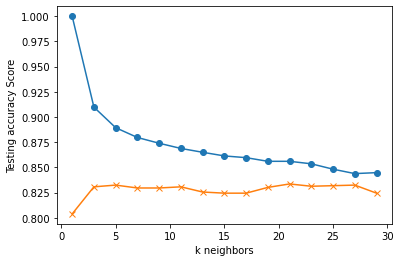

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()
    

# Train the Model



In [20]:
model1 = KNeighborsClassifier(n_neighbors=15)
model1.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=15)

In [21]:
print(f"Training Data Score: {model1.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model1.score(X_test_scaled, y_test)}")

Training Data Score: 0.8613389280946023
Testing Data Score: 0.8243707093821511


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
param_grid = {'n_neighbors': [7, 15, 23],
              'weights': ['uniform', 'distance']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=7, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=7, weights=uniform, score=0.841, total=   0.4s
[CV] n_neighbors=7, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...... n_neighbors=7, weights=uniform, score=0.829, total=   0.3s
[CV] n_neighbors=7, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ...... n_neighbors=7, weights=uniform, score=0.832, total=   0.3s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ...... n_neighbors=7, weights=uniform, score=0.824, total=   0.5s
[CV] n_neighbors=7, weights=uniform ..................................
[CV] ...... n_neighbors=7, weights=uniform, score=0.837, total=   0.3s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.840, total=   0.3s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.826, total=   0.3s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.831, total=   0.3s
[CV] n_neighbors=7, weights=distance .................................
[CV] ..... n_neighbors=7, weights=distance, score=0.825, total=   0.3s
[CV] n_neighbors=7, weights=distance .................................
[CV] .

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
target.value_counts()

In [ ]:
predictions=grid.predict(X_test)

In [ ]:
grid

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash

import joblib
filename = 'KNNtim.sav'
your_model=KNeighborsClassifier(n_neighbors=17, weights="distance")
joblib.dump(your_model, filename)